In [1]:
import pandas as pd
import numpy as np
import os

data_dir = 'C:/Users/Sakshee/Documents/DATASETS/Boschs Traffic Sign Recognition/images_gray'
category_names = os.listdir(data_dir)
num_classes = len(category_names)
print(num_classes)

images = []
for category in category_names:
    folder = data_dir + '/' + category
    images.append(len(os.listdir(folder)))

43


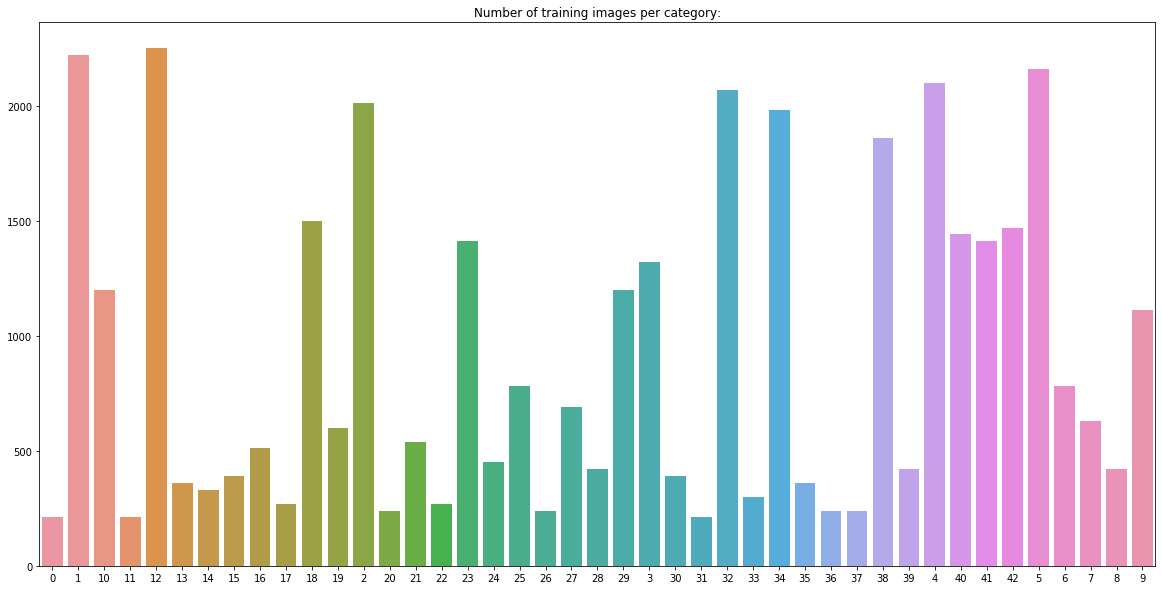

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.barplot(category_names, images).set_title("Number of training images per category:")
plt.show()

In [10]:
from keras.preprocessing.image import img_to_array, load_img
from PIL import Image

data = []
labels = []
img_size = 50

for i in range(num_classes):
    path = os.path.join(data_dir, str(i))
    images = os.listdir(path)
    
    for a in images:
        image = Image.open(path + '/' + a)
        image = image.resize((img_size, img_size))
        image = np.array(image)
        data.append(image)
        labels.append(i)           

data = np.array(data)      
labels = np.array(labels) 

Using TensorFlow backend.


In [22]:
print(data.shape)
print(labels.shape)

(39209, 50, 50)
(39209,)


In [24]:
data = data.reshape((39209, 50, 50, 1))

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(31367, 50, 50, 1) (7842, 50, 50, 1) (31367,) (7842,)


In [26]:
import keras
from keras.utils import to_categorical

Y_train=keras.utils.to_categorical(Y_train, num_classes)
Y_test= keras.utils.to_categorical(Y_test, num_classes)

print(Y_train.shape)
print(Y_test.shape)

(31367, 43)
(7842, 43)


In [27]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)         

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
batch_size = 32
epochs = 15

history = model.fit(X_train, Y_train,batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test) )

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 324s 10ms/step - loss: 0.9689 - accuracy: 0.7356 - val_loss: 0.0791 - val_accuracy: 0.9821
Epoch 2/15
31367/31367 [==============================] - 308s 10ms/step - loss: 0.1619 - accuracy: 0.9525 - val_loss: 0.0338 - val_accuracy: 0.9929
Epoch 3/15
31367/31367 [==============================] - 282s 9ms/step - loss: 0.0971 - accuracy: 0.9704 - val_loss: 0.0292 - val_accuracy: 0.9917
Epoch 4/15
31367/31367 [==============================] - 272s 9ms/step - loss: 0.0729 - accuracy: 0.9768 - val_loss: 0.0219 - val_accuracy: 0.9943
Epoch 5/15
31367/31367 [==============================] - 268s 9ms/step - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0154 - val_accuracy: 0.9959
Epoch 6/15
31367/31367 [==============================] - 286s 9ms/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 0.0177 - val_accuracy: 0.9963
Epoch 7/15
31367/31367 [==============================] - 266

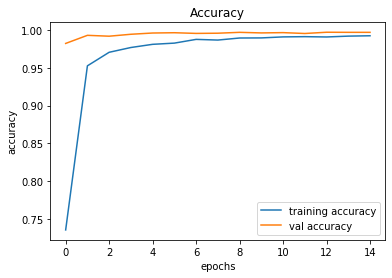

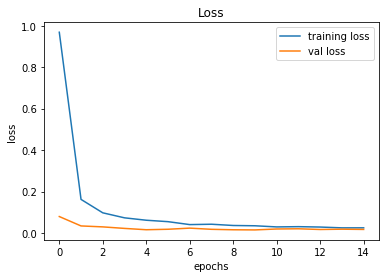

In [31]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()